In [1]:
# import needed libraries
import pandas as pd
import numpy as np

# read excel file
df = pd.read_csv('data/train_modified.csv')

# display general information of the df
display(df.info())

# display 5 random samples of our df
display(df.sample(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29304 non-null  float64
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29304 non-null  object 
 5   SQUARE_FT              29304 non-null  float64
 6   READY_TO_MOVE          29304 non-null  float64
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 2.7+ MB


None

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
10613,Dealer,0,0.0,1,BHK,660.066007,1.0,1,"Dombivli (East),Maharashtra",19.216700,73.083300,46.0
16903,Owner,0,0.0,2,BHK,684.111510,1.0,1,"Balaji Nagar,Chennai",12.981445,80.160441,40.0
16438,Owner,0,0.0,2,BHK,790.067720,1.0,1,"Poonamallee,Chennai",13.050000,80.110000,28.0
12704,Owner,0,1.0,1,BHK,657.189946,1.0,1,"Kirkatwadi,Pune",18.437138,73.794801,31.9
10409,Owner,1,0.0,2,BHK,892.857143,0.0,1,"Singaperumal koil,Chennai",12.760339,80.004278,34.0


Its clear from the summary above that the coulms (RERA, BHK_OR_RK, SQUARE_FT, READY_TO_MOVE) has some NaN values and need to be fixed. We will replace categorical data with the mode of the coulmns and the numrical data with the mean of the coulmn.

---

Here are the features with their types and description:

|         name         |    type    |                 description                 |
| :-------------------: | :---------: | :------------------------------------------: |
|       POSTED_BY       | Categorical | Category marking who has listed the property |
|  UNDER_CONSTRUCTION  |   Nominal   |          Under Construction or Not          |
|         RERA         |   Nominal   |             Rera approved or Not             |
|        BHK_NO.        |  Numerical  |               Number of Rooms               |
|       BHK_OR_RK       | Categorical |               Type of property               |
|       SQUARE_FT       |  Numerical  |    Total area of the house in square feet    |
|     READY_TO_MOVE     |   Nominal   |    Category marking Ready to move or Not    |
|        RESALE        |   Nominal   |        Category marking Resale or not        |
|        ADDRESS        | Categorical |           Address of the property           |
|       LONGITUDE       |  Numerical  |          Longitude of the property          |
|       LATITUDE       |  Numerical  |           Latitude of the property           |
| TARGET(PRICE_IN_LACS) |  Numerical  |              The property price              |



In [2]:

# this code was used to modify the data and add nan values to a new excel sheet
# !do not run this code 

# replace_idx = np.random.choice(df.index, size=int(len(df)*0.005), replace=False)
# col_to_replace = 'SQUARE_FT'
# df.loc[replace_idx, col_to_replace] = np.nan


# df.to_csv('data/train_modified1.csv', index=False)
# display(df)

In [3]:
# lets fix the nan values

for col in df.columns:
    # check if the column is of object type
    if df[col].dtype == 'object':
        # replace missing values with the most occurred string
        value = df[col].mode()[0]
    else:
        # if the values are nominal(0, 1, nan) replace with mod
        if len(df[col].unique()) == 3:
            # replace missing values with the mode value
            value = df[col].mode()[0]

        else:
            # replace missing values with the mean value
            value = df[col].mean()
            
    df[col].fillna(value, inplace = True)
                
display(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  float64
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  float64
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 2.7+ MB


None

In [4]:
display(df.describe())

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.316152,2.392279,1.988728e+04,0.821636,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.464981,0.879091,1.901334e+06,0.382825,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000474e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.177502e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.560176e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [5]:
# now we need to remove the outliers
# print(df.columns)

for col in df.columns:
    if df[col].dtype != 'object':
        Q3, Q1 = np.percentile(df[col], [75 ,25])
        IQR = Q3 - Q1
        
        # calculate the upper and lower bounds for outliers
        upper_bound = Q3 + 1.5*IQR
        lower_bound = Q1 - 1.5*IQR
        
        
        # delete the rows containing outliers
        if len(df[col].unique()) != 2 and col not in ['LONGITUDE', 'LATITUDE']:
            df =df[(df[col] <= upper_bound) & (df[col] >= lower_bound)]
display(df.describe())


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000
mean,0.178727,0.303310,2.253947,1160.571275,0.822762,0.934378,21.406205,77.092639,64.197803
std,0.383131,0.459697,0.715532,433.927854,0.381877,0.247625,6.294775,10.422785,38.329014
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,850.228908,1.000000,1.000000,18.097689,73.910000,35.000000
50%,0.000000,0.000000,2.000000,1116.504854,1.000000,1.000000,21.167876,77.351104,55.000000
75%,0.000000,1.000000,3.000000,1420.150054,1.000000,1.000000,26.916670,78.330000,85.000000
max,1.000000,1.000000,4.000000,2521.273243,1.000000,1.000000,59.912884,152.962676,180.000000


In [6]:
# lets find the statistical summary of our data

print("this is the statistical summary of the the categorical data:")
display(df.describe(include='object'))
print("________________________________________________________________________________")

print("\nthis is the statistical summary of the the numerical data:")
display(df.describe(exclude='object'))

this is the statistical summary of the the categorical data:


,POSTED_BY,BHK_OR_RK,ADDRESS
count,25525,25525,25525
unique,3,2,6337
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,14858,25501,501


________________________________________________________________________________

this is the statistical summary of the the numerical data:


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000
mean,0.178727,0.303310,2.253947,1160.571275,0.822762,0.934378,21.406205,77.092639,64.197803
std,0.383131,0.459697,0.715532,433.927854,0.381877,0.247625,6.294775,10.422785,38.329014
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,850.228908,1.000000,1.000000,18.097689,73.910000,35.000000
50%,0.000000,0.000000,2.000000,1116.504854,1.000000,1.000000,21.167876,77.351104,55.000000
75%,0.000000,1.000000,3.000000,1420.150054,1.000000,1.000000,26.916670,78.330000,85.000000
max,1.000000,1.000000,4.000000,2521.273243,1.000000,1.000000,59.912884,152.962676,180.000000


In [7]:
# since the nominal data are actually categorical i want to add them to the statistical summary 
# of the categorical data. i will encode them back to Strings where 1: yes, 0: no

df['RERA'] = df['RERA'].apply(lambda x: 'Yes' if x == 1 else 'No' )
df['UNDER_CONSTRUCTION'] = df['UNDER_CONSTRUCTION'].apply(lambda x: 'Yes' if x == 1 else 'No' )
df['READY_TO_MOVE'] = df['READY_TO_MOVE'].apply(lambda x: 'Yes' if x == 1 else 'No' )
df['RESALE'] = df['RESALE'].apply(lambda x: 'Yes' if x == 1 else 'No' )


In [8]:
# applying statistical summary again

print("this is the statistical summary of the the categorical data:")
display(df.describe(include='object'))
print("________________________________________________________________________________")

print("\nthis is the statistical summary of the the numerical data:")
display(df.describe(exclude='object'))

this is the statistical summary of the the categorical data:


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_OR_RK,READY_TO_MOVE,RESALE,ADDRESS
count,25525,25525,25525,25525,25525,25525,25525
unique,3,2,2,2,2,2,6337
top,Dealer,No,No,BHK,Yes,Yes,"Zirakpur,Chandigarh"
freq,14858,20963,17783,25501,21001,23850,501


________________________________________________________________________________

this is the statistical summary of the the numerical data:


,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,25525.000000,25525.000000,25525.000000,25525.000000,25525.000000
mean,2.253947,1160.571275,21.406205,77.092639,64.197803
std,0.715532,433.927854,6.294775,10.422785,38.329014
min,1.000000,3.000000,-37.713008,-121.761248,0.250000
25%,2.000000,850.228908,18.097689,73.910000,35.000000
50%,2.000000,1116.504854,21.167876,77.351104,55.000000
75%,3.000000,1420.150054,26.916670,78.330000,85.000000
max,4.000000,2521.273243,59.912884,152.962676,180.000000


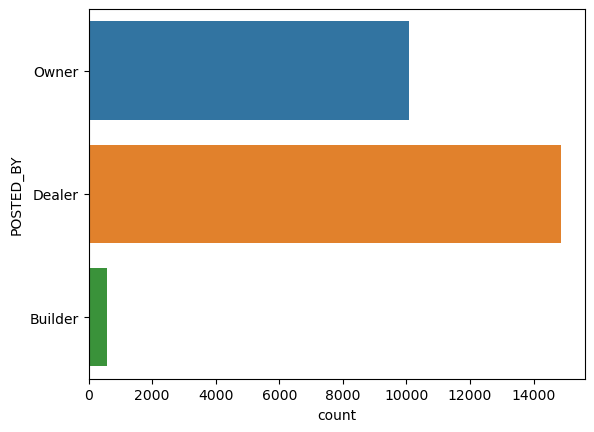

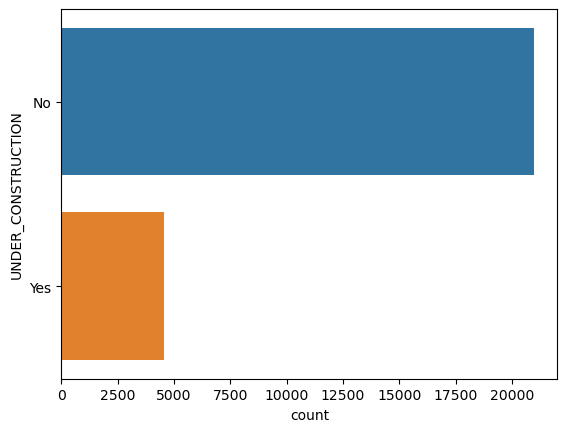

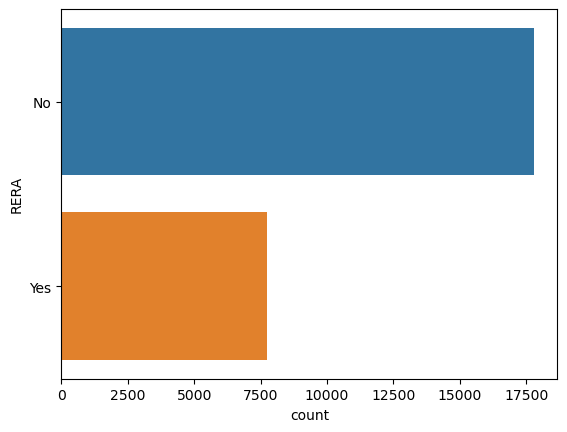

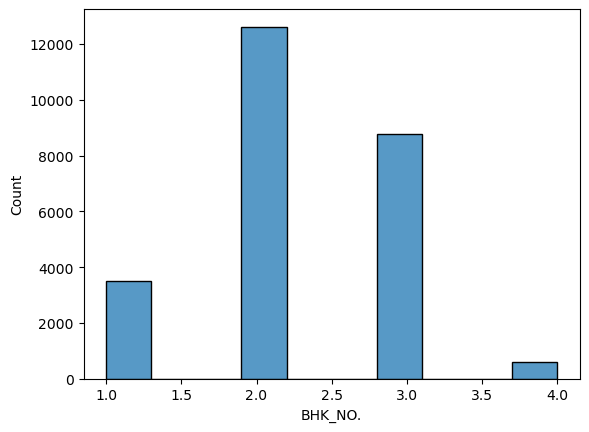

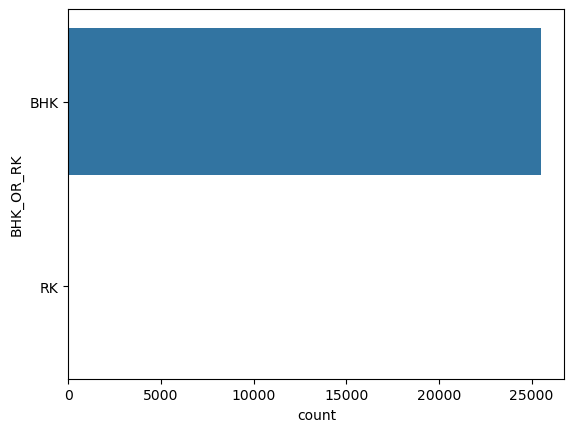

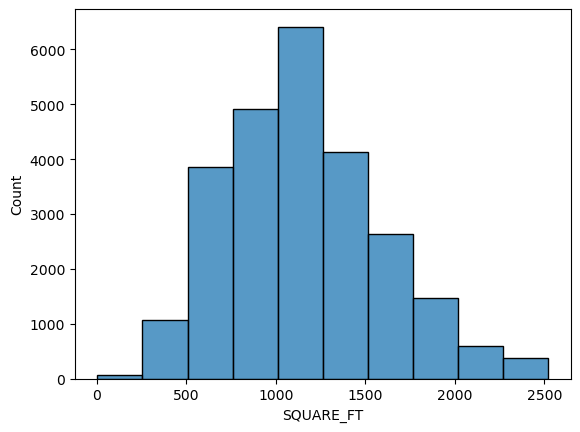

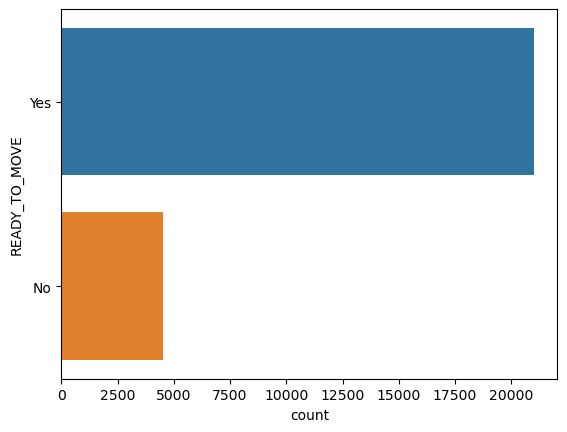

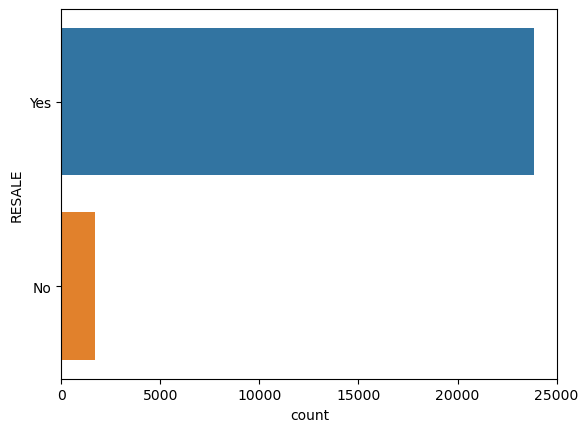

In [9]:
# histogram plots

import matplotlib.pyplot as plt
import seaborn as sns
for col in df.columns:
    if(col == 'ADDRESS'):
        break
    if df[col].dtype == 'object':
        plt.figure()
        sns.countplot(y=col,data=df)
        plt.show()
    else:
        plt.figure()
        sns.histplot(x=col,bins=10,data=df)
        plt.show()

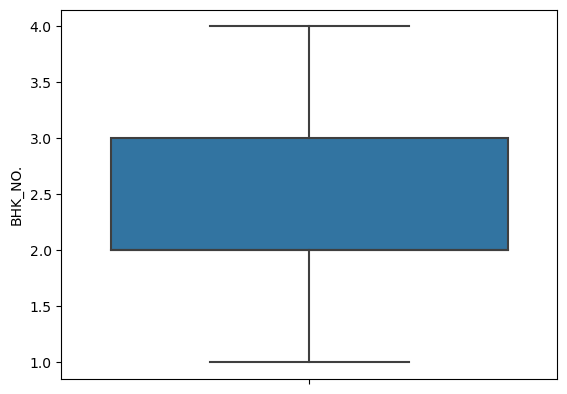

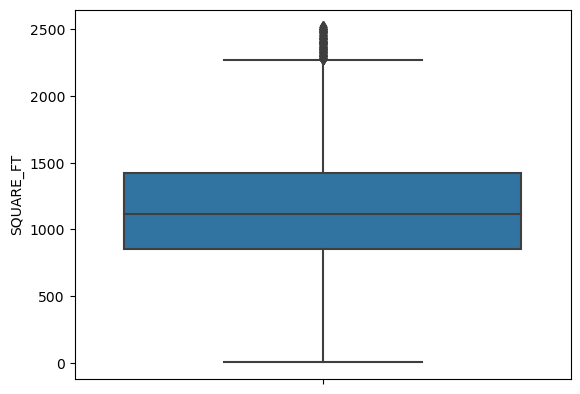

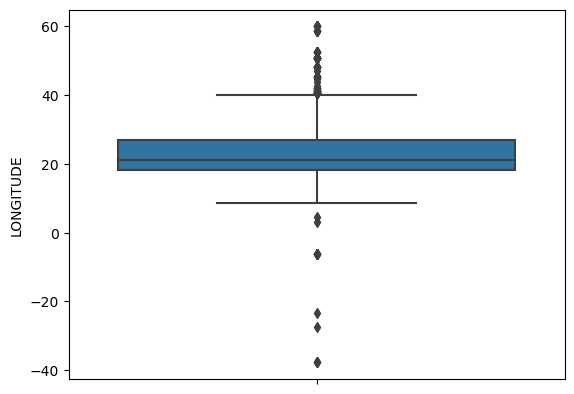

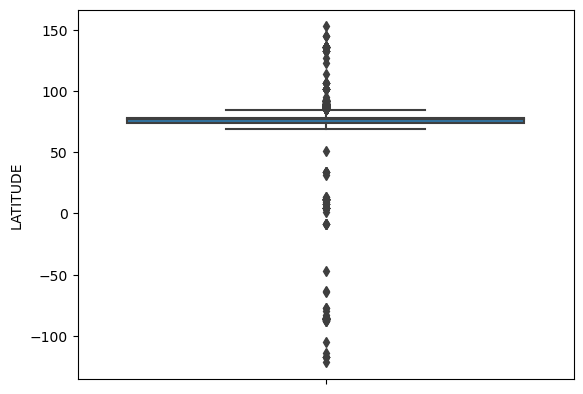

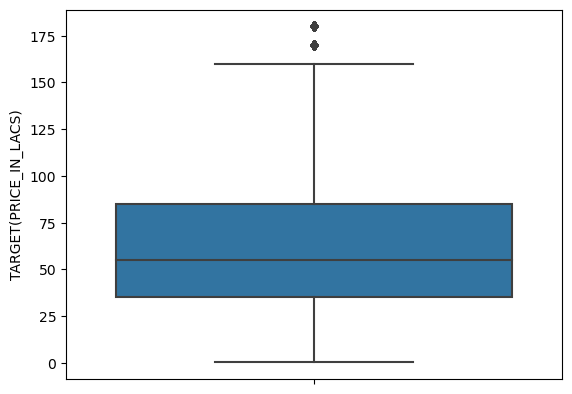

In [10]:
#Box plots

import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c,data=df)
    plt.show()


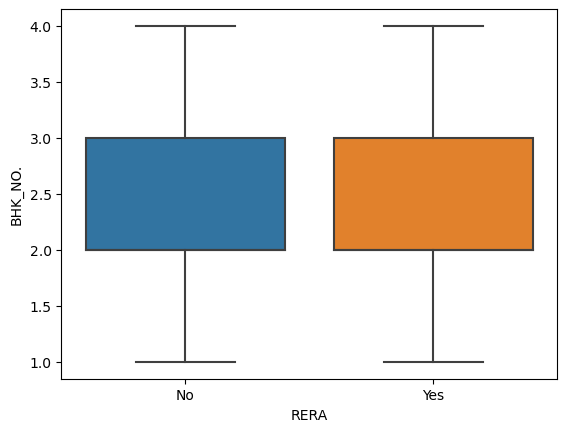

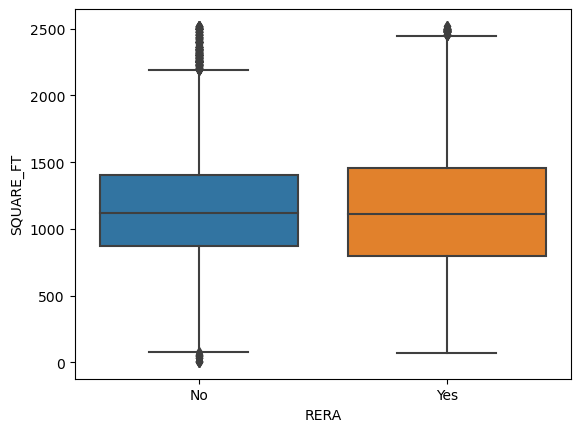

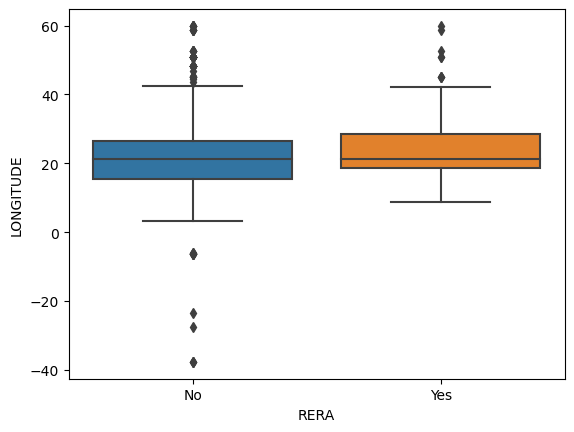

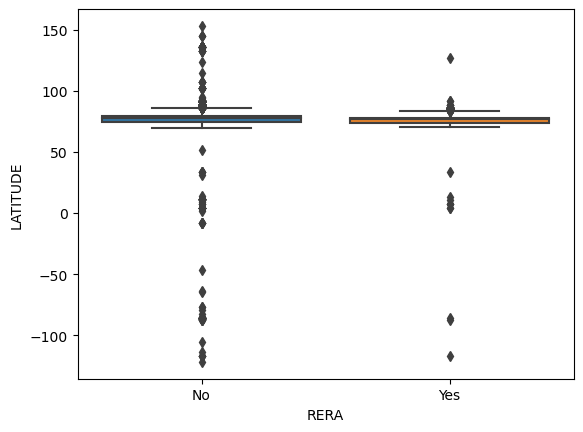

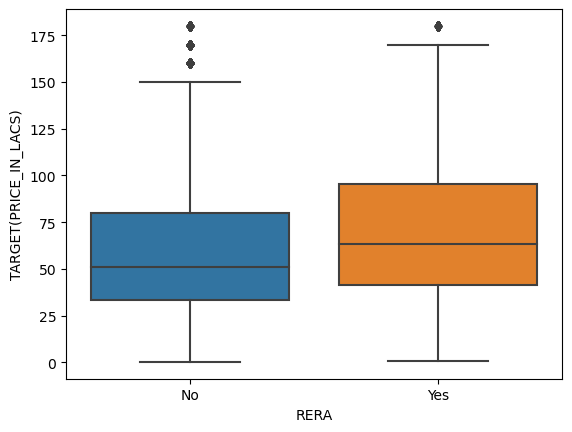

In [11]:
#box plots diffrentiated with RERA
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "RERA",data=df)
    plt.show()

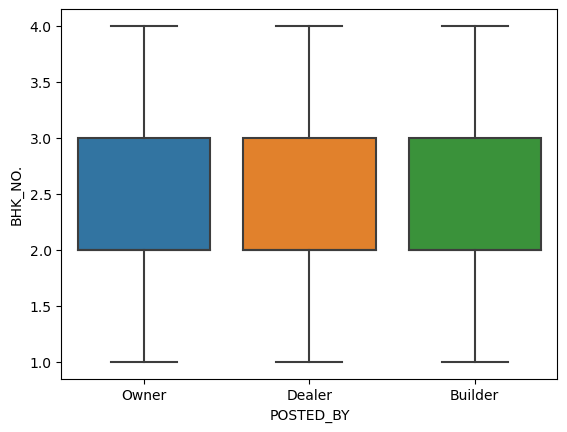

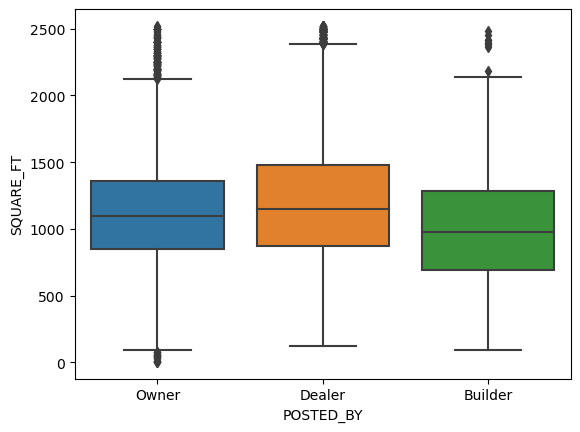

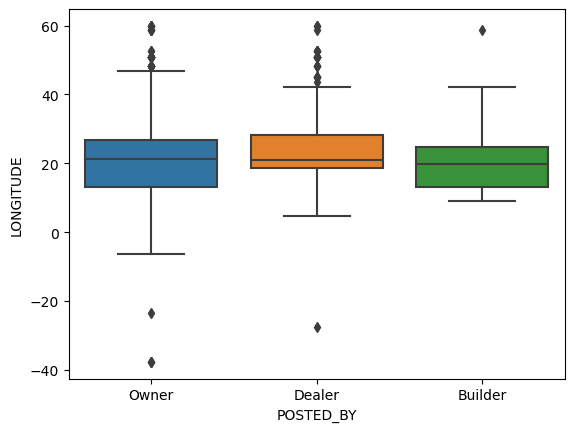

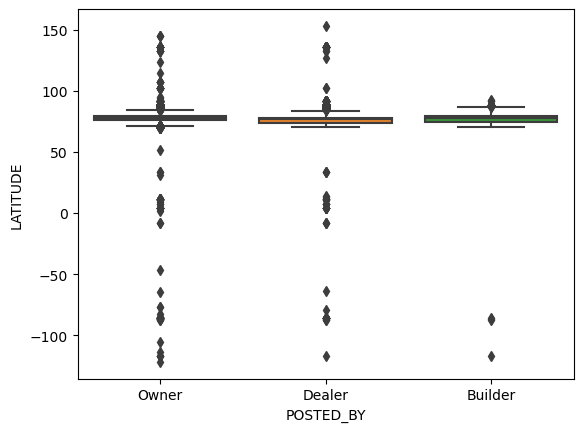

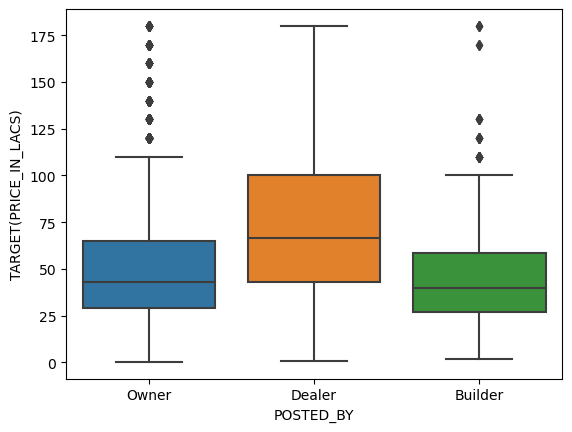

In [12]:
for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "POSTED_BY",data=df)
    plt.show()

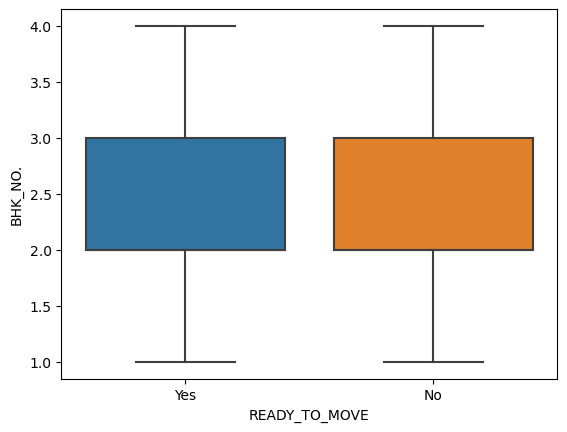

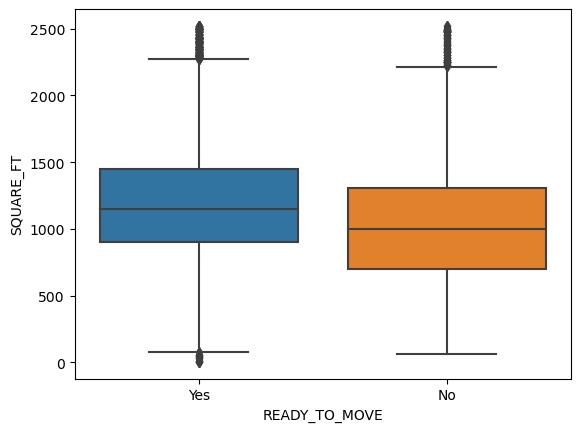

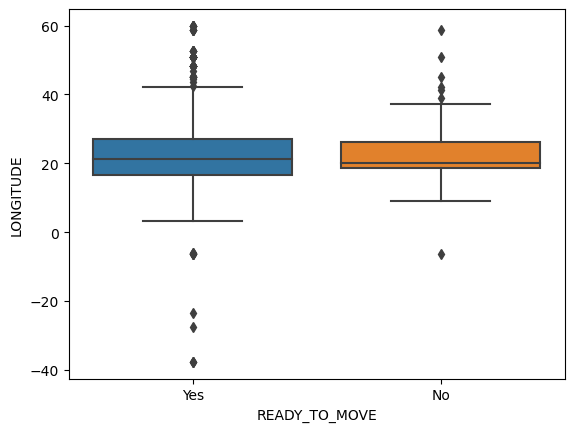

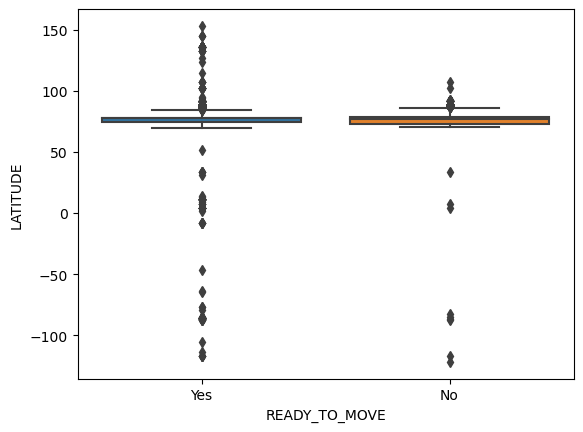

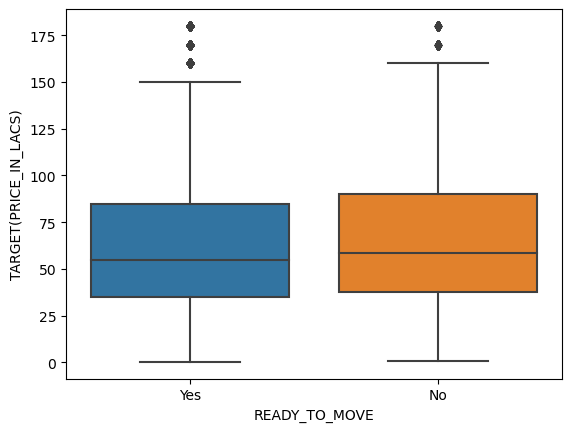

In [13]:
for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "READY_TO_MOVE",data=df)
    plt.show()

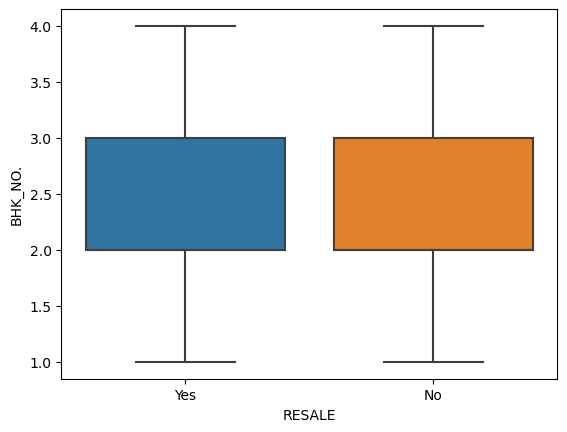

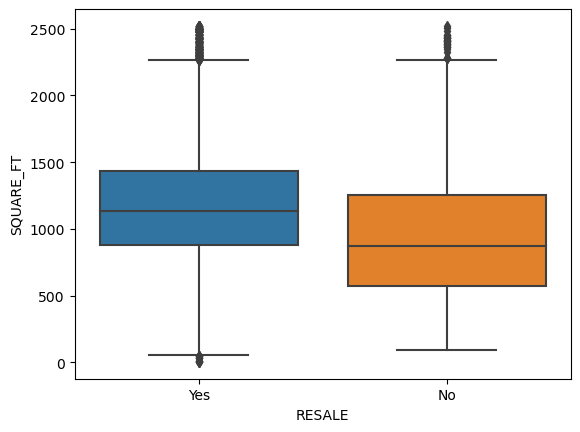

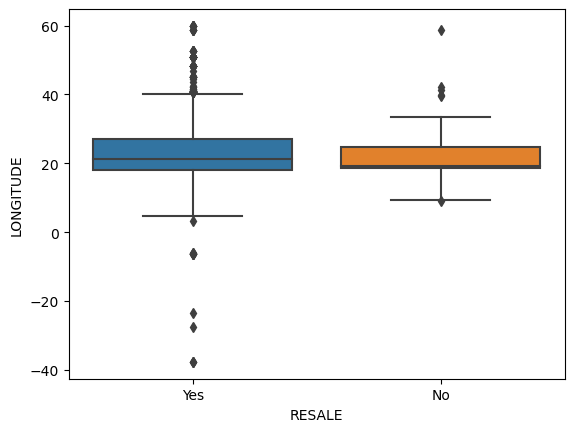

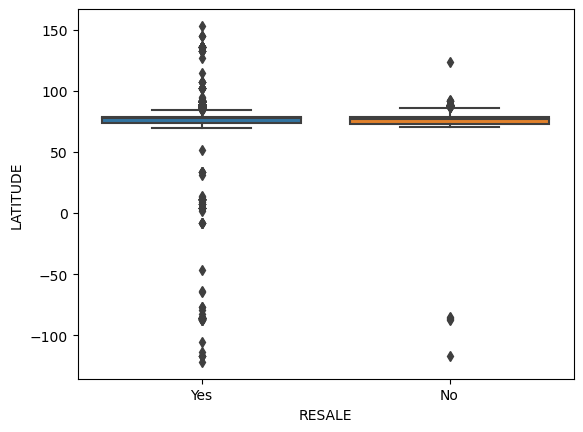

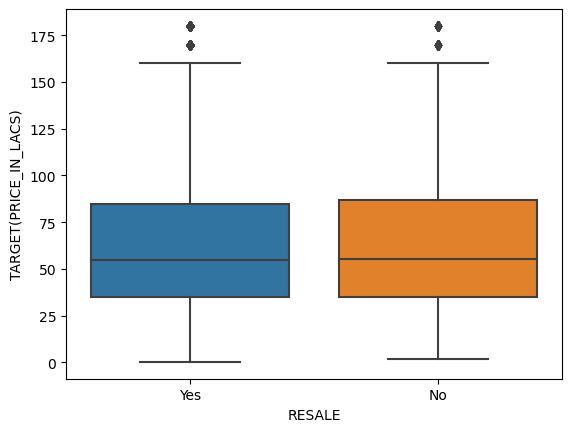

In [14]:
for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "RESALE",data=df)
    plt.show()

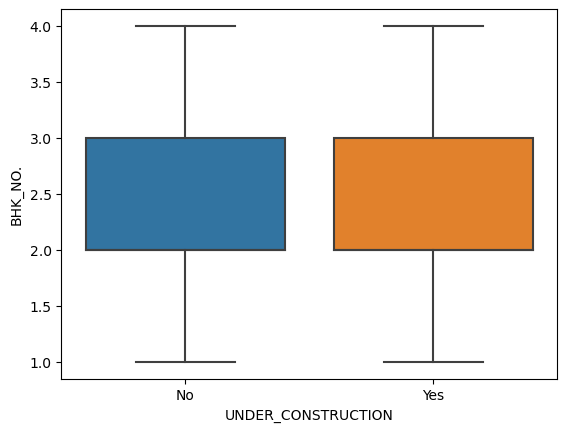

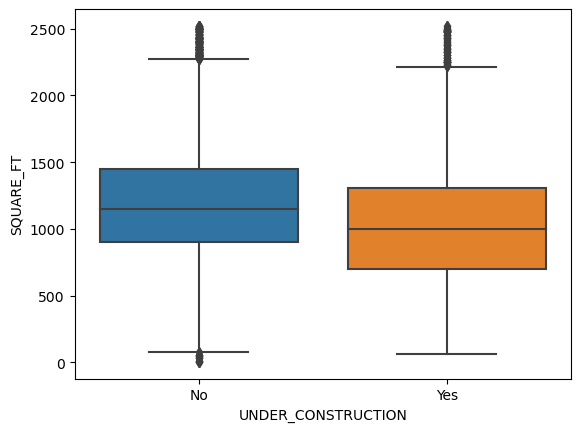

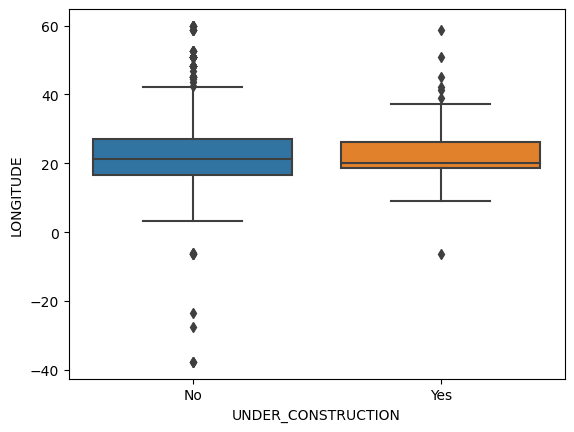

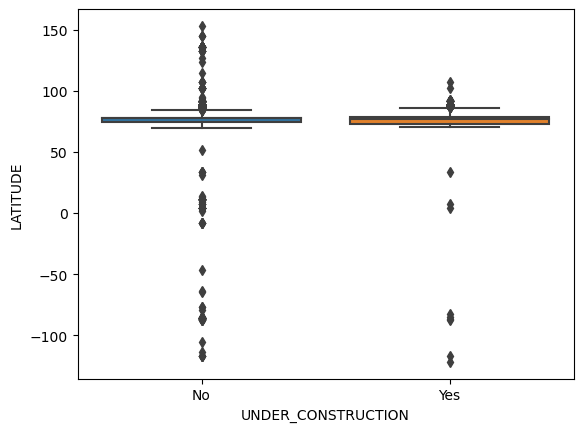

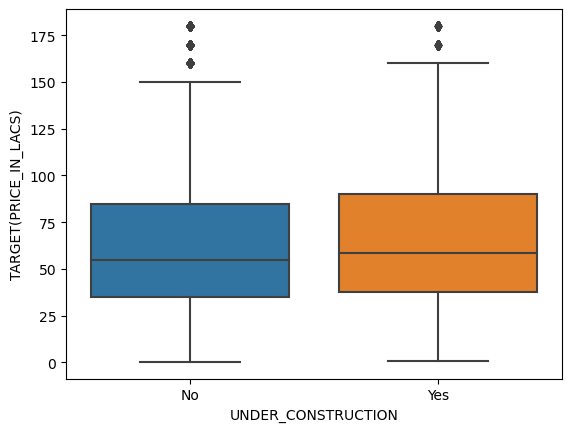

In [15]:
for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "UNDER_CONSTRUCTION",data=df)
    plt.show()

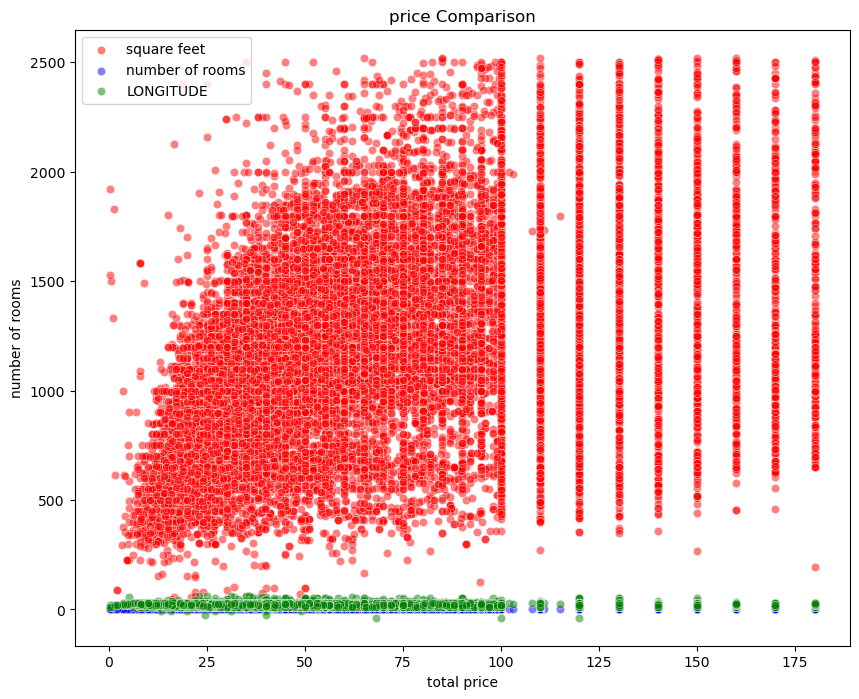

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='TARGET(PRICE_IN_LACS)', y='SQUARE_FT', color='red', label='square feet',  alpha=0.5, data=df)
sns.scatterplot(x='TARGET(PRICE_IN_LACS)', y='BHK_NO.',color='blue',label='number of rooms', alpha=0.5, data=df)
sns.scatterplot(x='TARGET(PRICE_IN_LACS)', y='LONGITUDE',color='green',label='LONGITUDE', alpha=0.5, data=df)
plt.ylabel("number of rooms");
plt.xlabel("total price");
plt.title("price Comparison");
plt.show()